## Loading Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from datetime import datetime
# Load the dataset
file_path = 'dataset.csv'
data = pd.read_csv(file_path)


data.head()


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,NaN,NaN,10/10/2015 18:21,NaN,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,NaN,NaN,NaN,NaN,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,NaN,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [2]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   URL                        1781 non-null   object 
 1   URL_LENGTH                 1781 non-null   int64  
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64  
 3   CHARSET                    1774 non-null   object 
 4   SERVER                     1605 non-null   object 
 5   CONTENT_LENGTH             969 non-null    float64
 6   WHOIS_COUNTRY              1475 non-null   object 
 7   WHOIS_STATEPRO             1419 non-null   object 
 8   WHOIS_REGDATE              1654 non-null   object 
 9   WHOIS_UPDATED_DATE         1642 non-null   object 
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64  
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64  
 12  REMOTE_IPS                 1781 non-null   int64  
 13  APP_BYTES                  1781 non-null   int64

## Handling Missing Values

In [3]:

missing_values = data.isnull().sum()
missing_values



URL                            0
URL_LENGTH                     0
NUMBER_SPECIAL_CHARACTERS      0
CHARSET                        7
SERVER                       176
CONTENT_LENGTH               812
WHOIS_COUNTRY                306
WHOIS_STATEPRO               362
WHOIS_REGDATE                127
WHOIS_UPDATED_DATE           139
TCP_CONVERSATION_EXCHANGE      0
DIST_REMOTE_TCP_PORT           0
REMOTE_IPS                     0
APP_BYTES                      0
SOURCE_APP_PACKETS             0
REMOTE_APP_PACKETS             0
SOURCE_APP_BYTES               0
REMOTE_APP_BYTES               0
APP_PACKETS                    0
DNS_QUERY_TIMES                1
Type                           0
dtype: int64

In [4]:

date_columns = ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']
for col in date_columns:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')

categorical_columns = data.select_dtypes(include='object').columns
categorical_summary = {col: data[col].value_counts() for col in categorical_columns}
categorical_summary

{'URL': URL
 M0_109     1
 B0_999     1
 B0_2292    1
 B0_2168    1
 B0_2108    1
           ..
 B0_104     1
 M1_3       1
 M0_53      1
 M0_50      1
 B0_676     1
 Name: count, Length: 1781, dtype: int64,
 'CHARSET': CHARSET
 UTF-8           676
 ISO-8859-1      427
 utf-8           379
 us-ascii        155
 iso-8859-1      134
 windows-1251      1
 ISO-8859          1
 windows-1252      1
 Name: count, dtype: int64,
 'SERVER': SERVER
 Apache                                                       386
 nginx                                                        211
 Microsoft-HTTPAPI/2.0                                        113
 cloudflare-nginx                                              94
 Microsoft-IIS/7.5                                             51
                                                             ... 
 mw2103.codfw.wmnet                                             1
 Apache/2.4.25 (Debian)                                         1
 ECD (fll/0790)               

In [5]:

if 'CONTENT_LENGTH' in data.columns:
    data['CONTENT_LENGTH'] = data['CONTENT_LENGTH'].fillna(data['CONTENT_LENGTH'].median())



In [6]:

for col in ['SERVER', 'DNS_QUERY_TIMES']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])



In [7]:

if 'CHARSET' in data.columns:
    data['CHARSET'] = data['CHARSET'].fillna(data['CHARSET'].mode()[0])



In [8]:

for col in ['WHOIS_COUNTRY', 'WHOIS_STATEPRO']:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])



In [9]:

for col in ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']:
    if col in data.columns:
        data[col] = pd.to_datetime(data[col], errors='coerce')





In [10]:

for col in ['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']:
    if col in data.columns:
        median_date = data[col].dropna().median()
        data[col] = data[col].fillna(median_date)


In [11]:

missing_values_after = data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)


Missing values after handling:
 URL                          0
URL_LENGTH                   0
NUMBER_SPECIAL_CHARACTERS    0
CHARSET                      0
SERVER                       0
CONTENT_LENGTH               0
WHOIS_COUNTRY                0
WHOIS_STATEPRO               0
WHOIS_REGDATE                0
WHOIS_UPDATED_DATE           0
TCP_CONVERSATION_EXCHANGE    0
DIST_REMOTE_TCP_PORT         0
REMOTE_IPS                   0
APP_BYTES                    0
SOURCE_APP_PACKETS           0
REMOTE_APP_PACKETS           0
SOURCE_APP_BYTES             0
REMOTE_APP_BYTES             0
APP_PACKETS                  0
DNS_QUERY_TIMES              0
Type                         0
dtype: int64


## EDA

In [12]:

print("\nSummary statistics:\n")
print(data.describe(include='all'))




Summary statistics:

           URL   URL_LENGTH  NUMBER_SPECIAL_CHARACTERS CHARSET  SERVER  \
count     1781  1781.000000                1781.000000    1781    1781   
unique    1781          NaN                        NaN       8     238   
top     M0_109          NaN                        NaN   UTF-8  Apache   
freq         1          NaN                        NaN     683     562   
mean       NaN    56.961258                  11.111735     NaN     NaN   
min        NaN    16.000000                   5.000000     NaN     NaN   
25%        NaN    39.000000                   8.000000     NaN     NaN   
50%        NaN    49.000000                  10.000000     NaN     NaN   
75%        NaN    68.000000                  13.000000     NaN     NaN   
max        NaN   249.000000                  43.000000     NaN     NaN   
std        NaN    27.555586                   4.549896     NaN     NaN   

        CONTENT_LENGTH WHOIS_COUNTRY WHOIS_STATEPRO  \
count      1781.000000          17

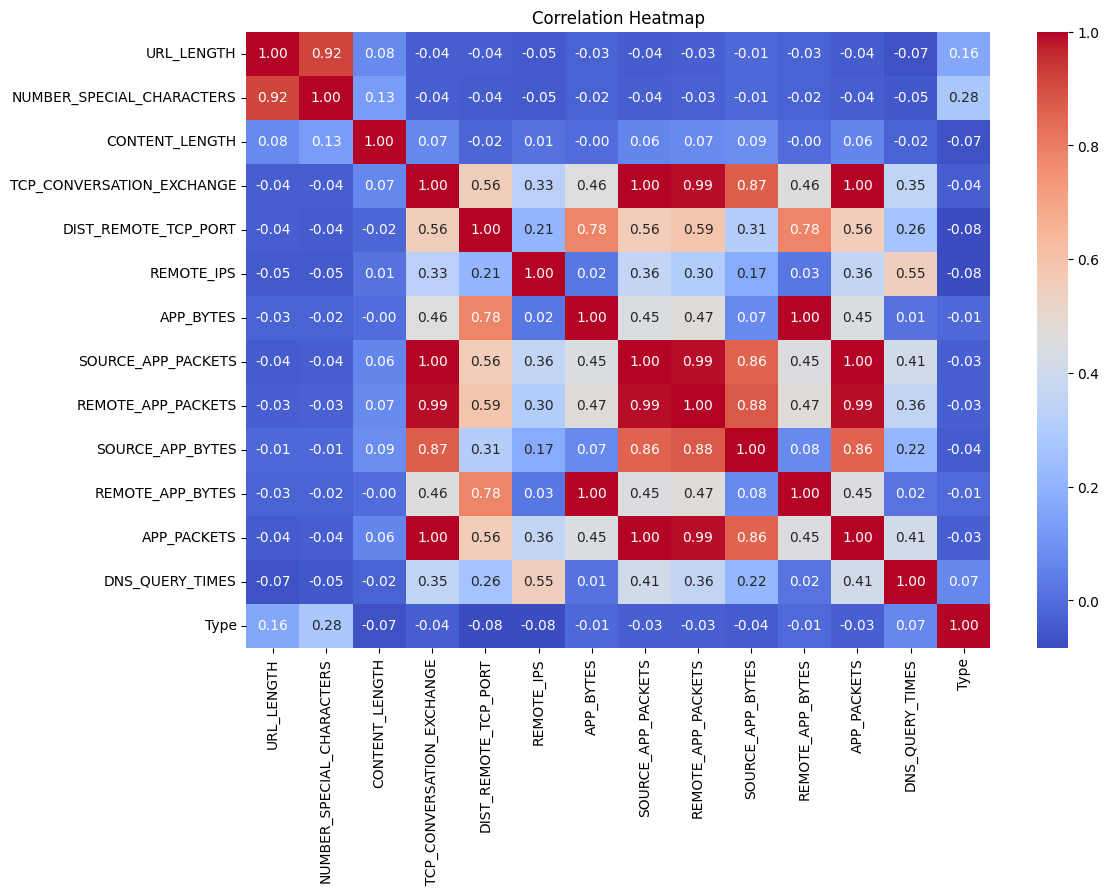

In [13]:

plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select numeric columns
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


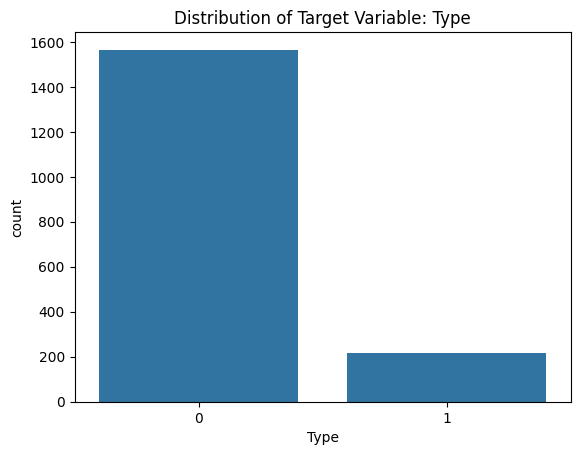

In [14]:

if 'Type' in data.columns:
    sns.countplot(x='Type', data=data)
    plt.title('Distribution of Target Variable: Type')
    plt.show()


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1781 entries, 0 to 1780
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   URL                        1781 non-null   object        
 1   URL_LENGTH                 1781 non-null   int64         
 2   NUMBER_SPECIAL_CHARACTERS  1781 non-null   int64         
 3   CHARSET                    1781 non-null   object        
 4   SERVER                     1781 non-null   object        
 5   CONTENT_LENGTH             1781 non-null   float64       
 6   WHOIS_COUNTRY              1781 non-null   object        
 7   WHOIS_STATEPRO             1781 non-null   object        
 8   WHOIS_REGDATE              1781 non-null   datetime64[ns]
 9   WHOIS_UPDATED_DATE         1781 non-null   datetime64[ns]
 10  TCP_CONVERSATION_EXCHANGE  1781 non-null   int64         
 11  DIST_REMOTE_TCP_PORT       1781 non-null   int64         
 12  REMOTE

## Feature Engineering

In [18]:
# Create a copy of the dataset for feature engineering
fe_dataset = data.copy()

def date_to_days(date):
    return (datetime.now() - date).days

fe_dataset['WHOIS_REG_AGE'] = fe_dataset['WHOIS_REGDATE'].apply(date_to_days)
fe_dataset['WHOIS_UPDATE_AGE'] = fe_dataset['WHOIS_UPDATED_DATE'].apply(date_to_days)

# Drop original date columns
fe_dataset.drop(columns=['WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], inplace=True)

# Separate features into numerical and categorical
numerical_features = [
    'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CONTENT_LENGTH',
    'TCP_CONVERSATION_EXCHANGE', 'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS',
    'APP_BYTES', 'SOURCE_APP_PACKETS', 'REMOTE_APP_PACKETS',
    'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES', 'APP_PACKETS',
    'DNS_QUERY_TIMES', 'WHOIS_REG_AGE', 'WHOIS_UPDATE_AGE'
]

categorical_features = ['CHARSET', 'SERVER', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO']

# Pipeline for numerical features
numerical_transformer = Pipeline([
    ('scaler', MinMaxScaler())
])

# Pipeline for categorical features
categorical_transformer = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Apply transformations
X = fe_dataset.drop(columns=['Type'])  # Features
y = fe_dataset['Type']  # Target variable

X_transformed = preprocessor.fit_transform(X)

# Convert transformed features back to a DataFrame
# Get feature names from one-hot encoding
cat_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
num_feature_names = numerical_features
all_feature_names = list(num_feature_names) + list(cat_feature_names)

X_transformed_df = pd.DataFrame(X_transformed.toarray(), columns=all_feature_names)

# Perform feature selection based on variance
selector = VarianceThreshold(threshold=0.01)  # Remove features with low variance
X_selected = selector.fit_transform(X_transformed_df)
selected_feature_names = [all_feature_names[i] for i in selector.get_support(indices=True)]

X_selected_df = pd.DataFrame(X_selected, columns=selected_feature_names)

X_selected_df.head()

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,REMOTE_IPS,DNS_QUERY_TIMES,WHOIS_REG_AGE,CHARSET_ISO-8859-1,CHARSET_UTF-8,CHARSET_iso-8859-1,CHARSET_us-ascii,CHARSET_utf-8,...,WHOIS_STATEPRO_FL,WHOIS_STATEPRO_IL,WHOIS_STATEPRO_MA,WHOIS_STATEPRO_NV,WHOIS_STATEPRO_NY,WHOIS_STATEPRO_ON,WHOIS_STATEPRO_PA,WHOIS_STATEPRO_PANAMA,WHOIS_STATEPRO_UT,WHOIS_STATEPRO_WA
0,0.000000,0.052632,0.117647,0.1,0.076860,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.026316,0.235294,0.0,0.584750,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.026316,0.000000,0.0,0.584750,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004292,0.026316,0.176471,0.4,0.755472,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.004292,0.026316,0.294118,0.2,0.777563,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ML Algorithm

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.2, random_state=42, stratify=y)

# Define models and hyperparameter grids
models = {
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=1000, random_state=42),
        'params': {'C': [0.01, 0.1, 1, 10]}
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(random_state=42),
        'params': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    },
    'SVC': {
        'model': SVC(random_state=42),
        'params': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']} #support vector machine
    }
}

# Cross-validation and hyperparameter tuning
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_estimators = {}

for name, config in models.items():
    grid_search = GridSearchCV(config['model'], config['params'], cv=cv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_estimators[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }




In [20]:
for name, result in best_estimators.items():
    train_score = result['best_estimator'].score(X_train, y_train)
    test_score = result['best_estimator'].score(X_test, y_test)
    print(f"Model: {name}")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Training Accuracy: {train_score}")
    print(f"Validation Accuracy: {result['best_score']}")
    print(f"Test Accuracy: {test_score}\n")


Model: LogisticRegression
Best Parameters: {'C': 0.1}
Training Accuracy: 0.9080056179775281
Validation Accuracy: 0.9080182851494936
Test Accuracy: 0.9355742296918768

Model: RandomForestClassifier
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Training Accuracy: 1.0
Validation Accuracy: 0.9536570298986904
Test Accuracy: 0.9719887955182073

Model: SVC
Best Parameters: {'C': 10, 'kernel': 'rbf'}
Training Accuracy: 0.961376404494382
Validation Accuracy: 0.9276748208549541
Test Accuracy: 0.9747899159663865



### Conclusion

We experimented with three models: **Logistic Regression**, **Random Forest Classifier**, and **Support Vector Classifier (SVC)**.

- **Logistic Regression** performed well with a test accuracy of 93.6% but was outperformed by the other models.
- **Random Forest** achieved 97.2% test accuracy, with perfect training accuracy, indicating strong generalization despite some overfitting.
- **SVC** achieved the highest test accuracy at 97.5%, balancing training and test performance well.

Conclusion: The best-performing model is **SVC**, followed by **Random Forest**, with **Logistic Regression** being a simpler, but less accurate, option.